## Titanic: Machine Learning from Disaster

**The objectives of this competition: In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc)**

The prediction for which passengers survived the Titanic shipwreck looks like a case of predicting discrete variables. Yes or No, 1 or 0. This is apparently a classification problem.

In [1]:
# Imported the python and machine learning modules
# for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning algorithms for classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

**Load the dataset**

In [2]:
# Previewing the first 5 rows of the training dataset
titanicTrainingData = pd.read_csv('train.csv')
titanicTrainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Previewing the last 5 rows of the training dataset
titanicTrainingData.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# Previewing the first 5 rows of the test dataset
titanicTestData = pd.read_csv('test.csv')
titanicTestData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Previewing the last 5 rows of test dataset
titanicTestData.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [51]:
# combine both train and test
combinedDataset = [titanicTrainingData, titanicTestData]

**Features available in the dataset**

In [7]:
print(titanicTrainingData.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**Which features are categorical and or numerical?**

In [8]:
titanicTrainingData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset**

In [9]:
titanicTrainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanicTestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
titanicTrainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**I decided to look at the target variable**

**I want to know the distribution of the target variable**

**I think there's a need to understand the distribution of the target variable with regards to the sex of the survivors before moving into analyzing the categorical and numerical variables** 

In [12]:
titanicSurvived = titanicTrainingData[['Survived', 'Sex']]
titanicSurvived.shape

(891, 2)

**I plotted a horizontal bar chart to get a better understanding** 

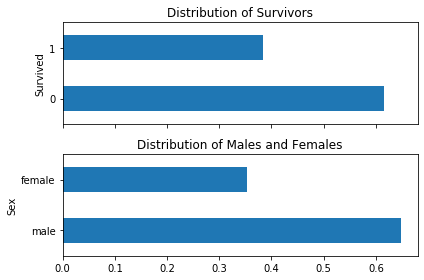

In [13]:
fig, ax = plt.subplots(2, 1, sharex=True)

dist_target = titanicSurvived.shape[0]

(titanicTrainingData['Survived']
    .value_counts()
    .div(dist_target)
    .plot.barh(title="Distribution of Survivors", ax=ax[0])
)
ax[0].set_ylabel("Survived")

(titanicTrainingData['Sex']
    .value_counts()
    .div(dist_target)
    .plot.barh(title="Distribution of Males and Females", ax=ax[1])
)
ax[1].set_ylabel("Sex")


fig.tight_layout()

**My observations from the chart**

*1. In the training dataset, an estimated 40% of passengers survived the mishap*

*2. Of the estimated 40%, female survivors make up more than 60%, males less than 40%*

*3. Why do we have more female survivors than males? Is that a relevant question?*

*4. Should this be taken into consideration as I proceed?*

**I think I'll plot more charts to understand the relationships between the target variable(Survived) and other independent variables.**

**By doing this, I think I'll definitely hit some snags that will inform data processing**

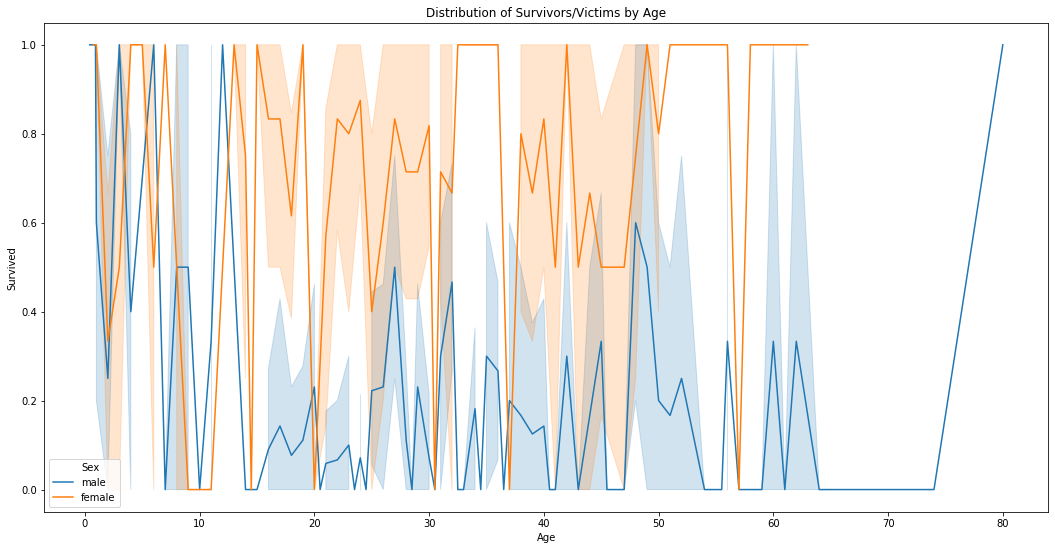

In [14]:
plt.figure(figsize=(18,9)) 

sns.lineplot(x = 'Age', y = 'Survived', hue = 'Sex', data = titanicTrainingData)
plt.title("Distribution of Survivors/Victims by Age")
plt.show()

**Observations**

*1. I think age plays a major factor in the survival numbers. A lot of the female survivors are within the Age group 3 - 48 yrs*

*2. I think the motto for helping people to safety was "women and children"*

*3. A good number of men who survived where the elderly*

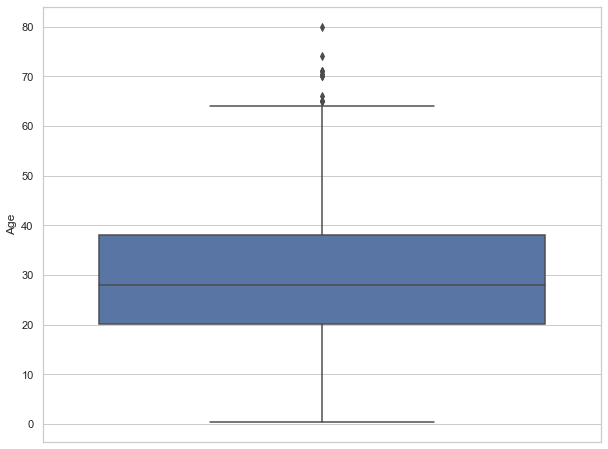

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Age', data=titanicTrainingData, orient="v")

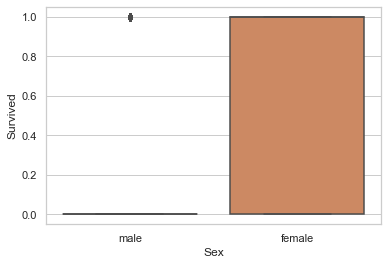

In [16]:
ax = sns.boxplot(x='Sex', y='Survived', data=titanicTrainingData, orient="v")

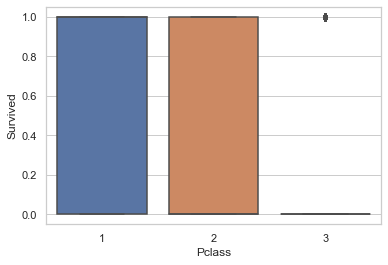

In [17]:
ax = sns.boxplot(x='Pclass', y='Survived', data=titanicTrainingData, orient="v")

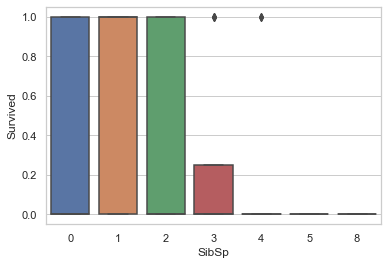

In [18]:
ax = sns.boxplot(x='SibSp', y='Survived', data=titanicTrainingData, orient="v")

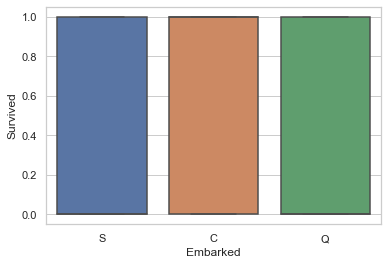

In [19]:
ax = sns.boxplot(x='Embarked', y='Survived', data=titanicTrainingData, orient="v")

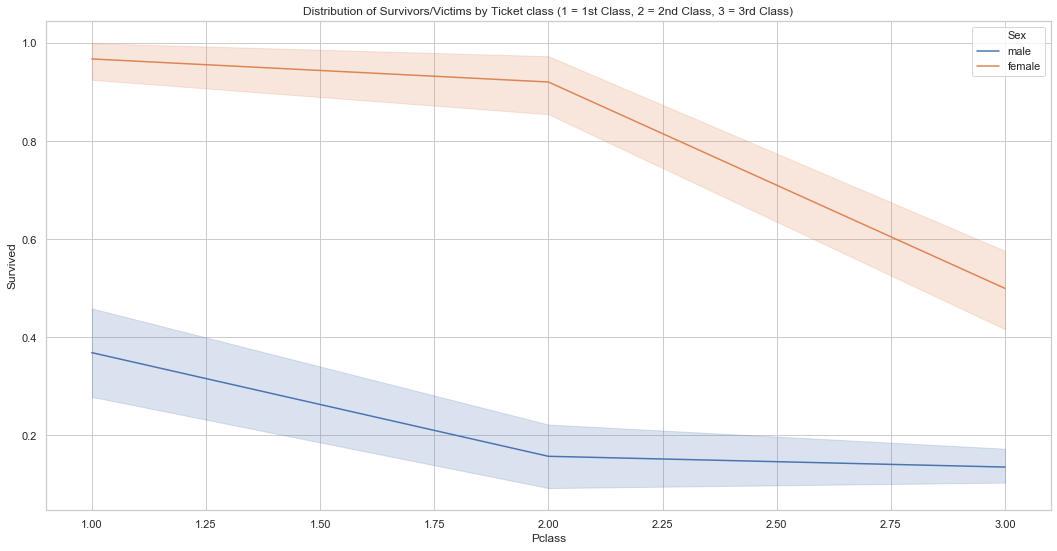

In [20]:
plt.figure(figsize=(18,9)) # ah.. the sweet 18 by 9 ratio

sns.lineplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanicTrainingData)
plt.title("Distribution of Survivors/Victims by Ticket class (1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class)")
plt.show()

In [21]:
counts = (titanicTrainingData[['Sex', 'Survived']]
              .groupby(['Sex', 'Survived'])
              .size()
              .unstack('Survived')
         )
counts

Survived,0,1
Sex,,
female,81,233
male,468,109


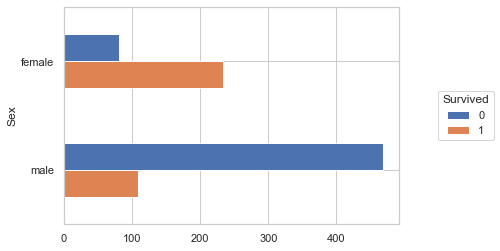

In [22]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='Survived'
)

In [23]:
survived_counts = counts.sum(axis='columns')
survived_counts

Sex
female    314
male      577
dtype: int64

In [24]:
props = counts.div(survived_counts, axis='index')
props

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


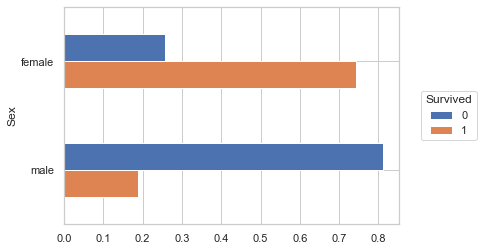

In [25]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='Survived'
)

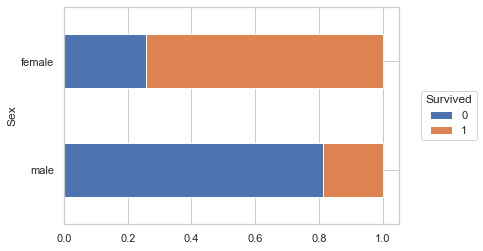

In [26]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='Survived'
)

In [27]:
def survived_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of survivor rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (titanicTrainingData[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

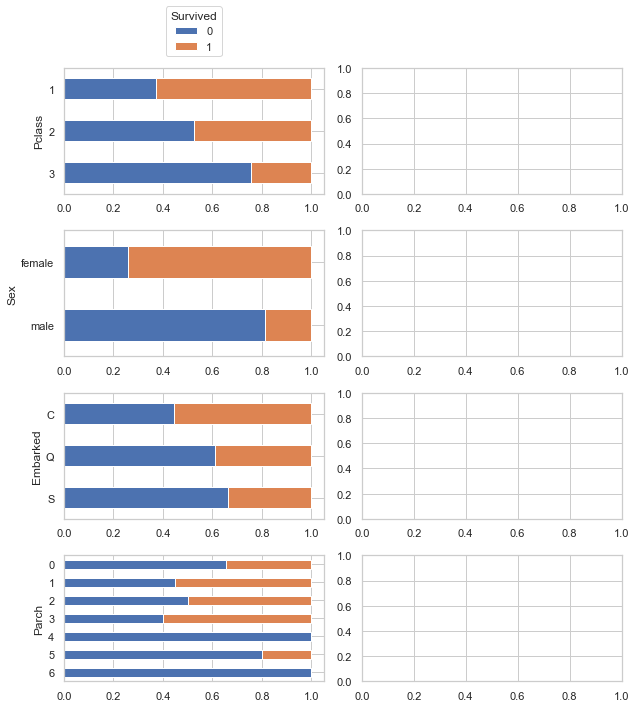

In [28]:
cols_to_plot = [
    'Pclass',
    'Sex',
    'Embarked',
    'Parch'
]

fig, ax = plt.subplots(
    len(cols_to_plot),2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    survived_rate_plot(
        col, 'Survived', titanicTrainingData, ax=ax[idx, 0]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='Survived'
)
fig.tight_layout()

**Obervations and what to do next**

*1. So far the following feature variables have an important correlation with survived; Sex, Pclass, Embarked, Age, Ticket class, Parents & Children.*

*2. Certain features like cabin, fare and # of siblings & spouses, ticket.. remain sketchy*

*3. Find out features with missing values and see if there's any significant difference* 


In [29]:
# distribution of numerical features
titanicTrainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
# distribution of categorical features
titanicTrainingData.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,347082,G6,S
freq,1,577,7,4,644


In [31]:
# Checking for Unique values over rows & Columns
titanicTrainingData.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [32]:
# Missing Values
titanicTrainingData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
titanicTrainingData.duplicated().sum()

0

**Analyze by Pivoting**

In [34]:
titanicTrainingData[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [35]:
titanicTrainingData[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [36]:
titanicTrainingData[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [37]:
titanicTrainingData[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [38]:
titanicTrainingData[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [39]:
titanicTrainingData[["Ticket", "Survived"]].groupby(['Ticket'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Ticket,Survived
0,110152,1.0
180,26360,1.0
483,386525,1.0
479,382651,1.0
151,244373,1.0
...,...,...
385,349246,0.0
384,349245,0.0
197,2669,0.0
382,349243,0.0


**I want to compute the missing values of the following features: Age & Embarked**

**I will likely drop certain features that has little or no correlation with survival on the Titanic. Features like 'PassengerId', 'Ticket', 'Cabin', & 'Name'**

**I tried to visualize the Age feature in correlation with the target variable, but hit a snag because the values won't make for easy visualization. I tried to create an Age group feature to see if I can visualize that.**

**Still don't know what to do with the Fare feature**

**It is safe to say women survived more than men**

**Age is a factor for survival, children and old folks**

**Ticket class is a major factor for survival, the upper class folks survived more than other classes(pot of beans something)**

**Finally, I figured how to visualize the Age feature to find any existing correlation with the target variable**

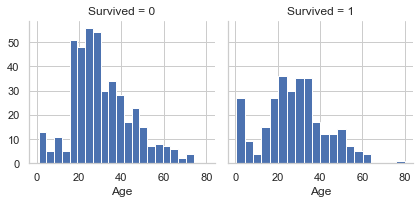

In [40]:
g = sns.FacetGrid(titanicTrainingData, col='Survived')
g.map(plt.hist, 'Age', bins=20);

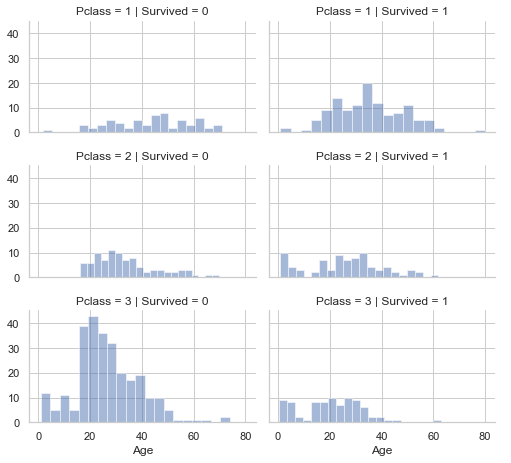

In [41]:
# grid = sns.FacetGrid(titanicTrainingData, col='Pclass', hue='Survived')
grid = sns.FacetGrid(titanicTrainingData,
                     col='Survived',
                     row='Pclass',
                     height=2.2,
                     aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

/Users/peterokwukogu/anaconda3/envs/data_sci/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/peterokwukogu/anaconda3/envs/data_sci/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


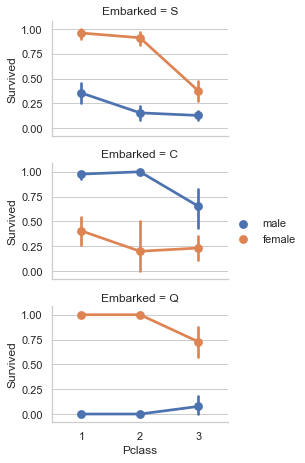

In [42]:
# grid = sns.FacetGrid(titanicTrainingData, col='Embarked')
grid = sns.FacetGrid(titanicTrainingData, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/Users/peterokwukogu/anaconda3/envs/data_sci/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


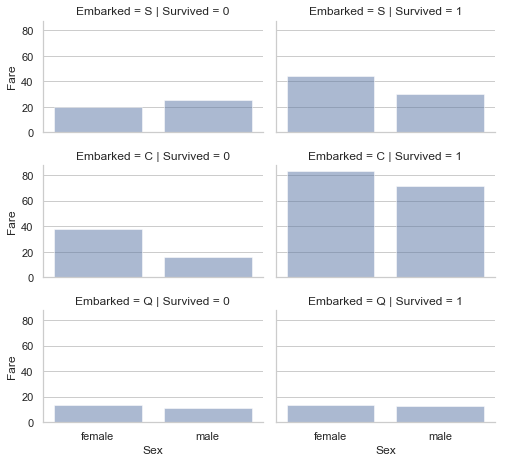

In [43]:
# grid = sns.FacetGrid(titanicTrainingData, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(titanicTrainingData, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend();

**Time to drop some features and see if there's need for recode and new columns**

*I think the PassengerId, Cabin & Ticket features doesn't serve much in the grand scheme of this classification*

*It is also important to note that this operation will be performed on the train and test data*

In [47]:
titanicTrainingData.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [48]:
titanicTestData.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


**The shape of the train & test dataset before dropping unwanted features**

In [52]:
print("Before", titanicTrainingData.shape, titanicTestData.shape, combinedDataset[0].shape, combinedDataset[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)


**Dropping the Cabin and Ticket features from the train dataset**

In [53]:
titanicTrainingData = titanicTrainingData.drop(['Ticket', 'Cabin'], axis=1)

**Dropping the Cabin and Ticket features from the test dataset**

In [55]:
titanicTestData = titanicTestData.drop(['Ticket', 'Cabin'], axis=1)

**After dropping the features, I combine the train & test like I did intially**

*I don't have any technical reason for combining train and test but it feels good to replicate what I have noticed in other notebooks*

In [56]:
combinedDataset = [titanicTrainingData, titanicTestData]

**The shape of the train & test dataset after dropping unwanted features**

In [57]:
"After", titanicTrainingData.shape, titanicTestData.shape, combinedDataset[0].shape, combinedDataset[1].shape

('After', (891, 10), (418, 9), (891, 10), (418, 9))